# Machine Learning Engineer Nanodegree

## Capstone Project: C-CORE Iceberg - CNN Classfier 

### Domain Background

There are several satellites in the sky, which usually orbit around at several kilometers high, have a capability for “remote sensing” objects on earth. They can capture object images regularly at any given place or location. They are equipped with radars that can even “see through” any weather conditions like “rain, cloud or fog” as these radars can emit own energy to receive images in any weather conditions.

Figure Reference:  https://www.thedailybeast.com/now-you-can-hunt-for-malaysia-airlines-flight-370 ( GETTY)

<img src="images/satellite1.jpg" height="75%" width="75%">

These satellite radars use much like a “SONAR” technology which can send and detect signals bounced off an object and then analyze these signals to identify to translate to an image. Inside the translated image, bright spots are usually the objects representation because objects can reflect more energy back when compared to the surrounding environment. However, the main challenge that scientists face is classification of these objects. These bright spots can be anything. When scanning the big oceans or seas, these bright objects can be small islands, icebergs, big ships, small boats etc. 

<img src="images/ship_iceberg1.jpg" height="55%" width="55%"/>

<BR><BR>
<img src="images/ship_iceberg1.jpg"  height="45%" width="55%"/>
<BR>
<img src="images/hr_hv1.jpg" height="45%" width="45%"/>
<BR>

Having our radar just detecting these objects in ocean won’t be of much help unless we analyze the background environment surrounding these objects. In our case, we need to analyze the backscatter of the ocean or surrounding area of the object in order to identify the object type. But again, another challenge that we face is that this backscatter can be inconsistent and can be affected by weather conditions like high winds produce brighter background while low winds generate a darker kind of background of the image.
There are other factors to consider that affect the image background like the radar incident angle and radar polarization like how radars send and receive the energy back from the object. Some satellite radars can send and receive images back in both horizontal and vertical planes (dual-polarization).
In our data domain to analyze, we have data with two channels to consider: 
* HH (transmit/receive horizontally)
* HV (transmit horizontally and receive vertically)<BR>
As you can see from the below examples (courtesy: C-CORE and Statoil), objects like Iceberg and Ships look entirely different in these 2 different channels (HH & HV) due to image reflections are differences in these channels. Our human brains are trained to classify some of these images but it is going to impractical when we face millions of such images to process and classify in a limited time.  

<img src="images/hr_hv2.jpg"  height="55%" width="55%"/><BR>
<img src="images/hr_hv2a.jpg"  height="55%" width="55%"/><BR>

Reference: https://www.kaggle.com/c/statoil-iceberg-classifier-challenge
<BR>
Below are few more challenging objects to classify. Is seems so difficult to automate the process of identifying whether it is a Ship or is it an Iceberg.<BR>

<img src="images/hr_hv2b.jpg"  height="55%" width="55%"/><BR>
<img src="images/hr_hv2c.jpg"  height="55%" width="55%"/><BR>

Reference: https://www.kaggle.com/c/statoil-iceberg-classifier-challenge

### Problem Statement

There were many incidents in the past that drifting icebergs posed many challenges and even threats or catastrophic damages (major being Titanic syncing) especially near polar regions like East Coast of Canada.

<img src="images/iceberg_sample.jpg"  height="55%" width="55%"/><BR>

Iceberg Picture - Reference: http://www.cbc.ca/radio/thisisthat/mp-forgets-names-iceberg-150-street-art-trashed-cross-country-skiing-1.3865163/400-ton-iceberg-to-be-sent-on-cross-country-tour-to-celebrate-canada-150-1.3865168

Some companies use aerial reconnaissance and other navigational tools to monitor the icebergs to prevent any potential dangers to ships and other vessels. But, this process proves to be difficult to implement in remote places where harsh and unformidable conditions prevail. In such cases, monitoring via satellites proves to be an effective solution.
I think this is where we can leverage emerging “Machine Learning” technologies including deep learning capabilities to address such issues with an objective to help the mankind by accurately detecting and differentiating these life-threatening icebergs as soon as possible.

In this project, our challenge is to build machine learning algorithms and pipelines that can automatically identify and classify ships & icebergs by processing satellite radar images of such objects. This is will not only help in cutting operational costs but also ensures the safe working environment for many.

### Data Inputs

train.json, test.json
The data (train.json, test.json) is presented in json format. The files consist of a list of images, and for each image, you can find the following fields:

•	id - the id of the image
•	band_1, band_2 - the flattened image data. Each band has 75x75 pixel values in the list, so the list has 5625 elements. Note that these values are not the normal non-negative integers in image files since they have physical meanings - these are float numbers with unit being dB. Band 1 and Band 2 are signals characterized by radar backscatter produced from different polarizations at a particular incidence angle. The polarizations correspond to HH (transmit/receive horizontally) and HV (transmit horizontally and receive vertically). More background on the satellite imagery can be found here.
•	inc_angle - the incidence angle of which the image was taken. Note that this field has missing data marked as "na", and those images with "na" incidence angles are all in the training data to prevent leakage.
•	is_iceberg - the target variable, set to 1 if it is an iceberg, and 0 if it is a ship. This field only exists in train.json.

https://www.kaggle.com/c/statoil-iceberg-classifier-challenge/download/sample_submission.csv.7z
https://www.kaggle.com/c/statoil-iceberg-classifier-challenge/download/test.json.7z
https://www.kaggle.com/c/statoil-iceberg-classifier-challenge/download/train.json.7z
sample_submission.csv
The submission file in the correct format:
•	id - the id of the image
•	is_iceberg - your predicted probability that this image is iceberg.


### Bench Mark Model

The model with the Public Leaderboard current top score of multi-class logarithmic loss value 0.1029 of  will be used as a benchmark model. <BR>
Attempt will be made so that score (multi-class logarithmic loss) obtained will be among the<B> top 50% of the Public Leaderboard submissions</B>.

### Evaluation Metrics

Solution is evaluated based on the log loss between the predicted values and the ground truth.

This is the multi-class version of the Logarithmic Loss metric. Each observation is in one class and for each observation, you submit a predicted probability for each class. The metric is negative the log likelihood of the model that says each test observation is chosen independently from a distribution that places the submitted probability mass on the corresponding class, for each observation.
![Log Loss Formula](images/logloss_frm.jpg)
		 
where N is the number of observations, M is the number of class labels, loglog is the natural logarithm, yi,j is 1 if observation ii is in class jj and 0 otherwise, and pi,j is the predicted probability that observation ii is in class jj.
<BR>
Both the solution file and the submission file are CSV's where each row corresponds to one observation, and each column corresponds to a class. The solution has 1's and 0's (exactly one "1" in each row), while the submission consists of predicted probabilities. <BR>
The submitted probabilities need not sum to 1, because they will be rescaled (each is divided by the sum) so that they do before evaluation.
(Note: the actual submitted predicted probabilities are replaced with max(min(p,1−10−15),10−15)max(min(p,1−10−15),10−15).)


### Data Exploration

In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import log_loss
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [4]:
os.chdir('C:\Madhan\myUdacity\TODO\capstone\C-CORE Iceberg Classifier')
os.listdir('.\data')

['orig', 'sample_submission.csv', 'stacking', 'test.json', 'train.json']

In [5]:
#Loading the input training and testing data.
train = pd.read_json("./data/train.json")
test = pd.read_json("./data/test.json")
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [6]:
test.head()

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


In [27]:
# Reshaping the input band 1 (HH) and band 2 (HV) data in 75x75 pixel format.
# Then, we create band 3 which is average of of HH and HV bands
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_band_3=(X_band_1+X_band_2)/2
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],X_band_3[:, :, :, np.newaxis]], axis=-1)

X_band_t1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_t2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_band_t3=(X_band_t1+X_band_t2)/2
X_test = np.concatenate([X_band_t1[:, :, :, np.newaxis], X_band_t2[:, :, :, np.newaxis], X_band_t3[:, :, :, np.newaxis]], axis=-1)

### Data Visualization

In [73]:
# Visualizing the iceberg using bands data

import plotly.offline as ply
import plotly.graph_objs as grfo

ply.init_notebook_mode(connected=True)

def plot3Dobj(channel, name):

    plotdata = [ grfo.Surface( z=channel ) ]
    
    plotlayout = grfo.Layout(
        title=name,
        autosize=False,
        width=550,
        height=550,
        margin=dict( l=65, r=50, b=65, t=90 )
    )
    
    figure = grfo.Figure(data=plotdata, layout=plotlayout)
    ply.iplot(figure)
    
plot3Dobj(X_band_1[12,:,:], 'Iceberg')

Above is a nice looking plot of a sample 'Iceberg'. Since this data is collected from a "Radar", it looks more like a mountain because of the scatter effect of the radar signal. We can create more composite images using the backscatter from the radar. Now, let's plot the Ship image.

In [74]:
plot3Dobj(X_band_1[14,:,:], 'Ship')

This looks like a ship which shapes like an elongated point. Since we don't have higher resolution image, it is kind of tough job to plot the exact shape of the Ship. You can refer to the following document that explains better on how to differentiate ships from ice-bergs using CNN networks. Really helpful indeed.

http://elib.dlr.de/99079/2/2016_BENTES_Frost_Velotto_Tings_EUSAR_FP.pdf 

### Plotting Raw Images

We can plot the ship and iceberg images to cross-compare and learn more about the features before we investigate further exploration. Raw images are of size 75x75 size.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

icebergs = train[train.is_iceberg==1].sample(n=9,random_state=123)
ships = train[train.is_iceberg==0].sample(n=9,random_state=456)

<B> Band 1 - Random 8 Icebergs </B>

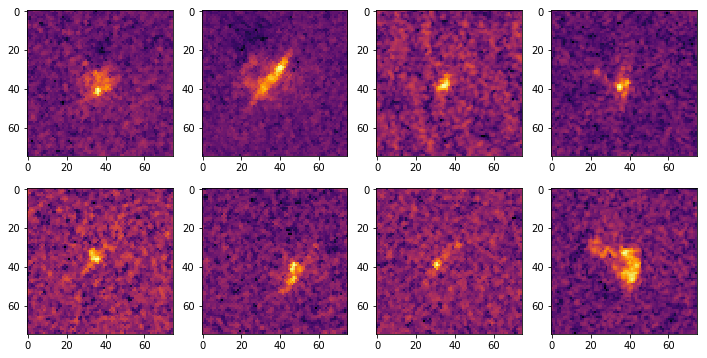

In [11]:
# Plot band_1 - icebergs
figure = plt.figure(1,figsize=(12,6))

for id in range(8):
    axis = figure.add_subplot(2,4,id+1)
    imgarr = np.reshape(np.array(icebergs.iloc[id,0]),(75,75))
    axis.imshow(imgarr,cmap='inferno')
    
plt.show()

<B>Band 1 - Random 8 Ships</B>

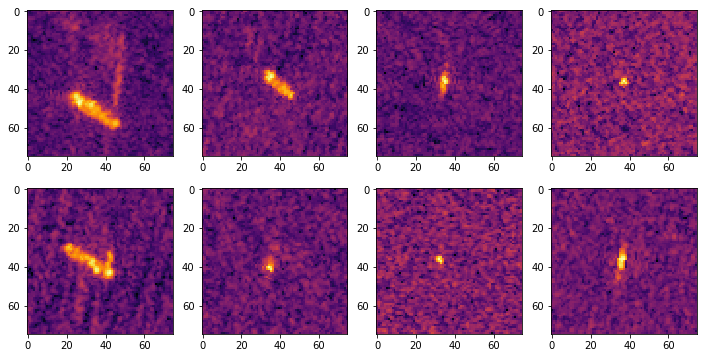

In [12]:
# Plot band_1 - Ships

figure = plt.figure(1,figsize=(12,6))

for id in range(8):
    axis = figure.add_subplot(2,4,id+1)
    imgarr = np.reshape(np.array(ships.iloc[id,0]),(75,75))
    axis.imshow(imgarr,cmap='inferno')
    
plt.show()

<B>Band 2 - Random 8 Icebergs</B>

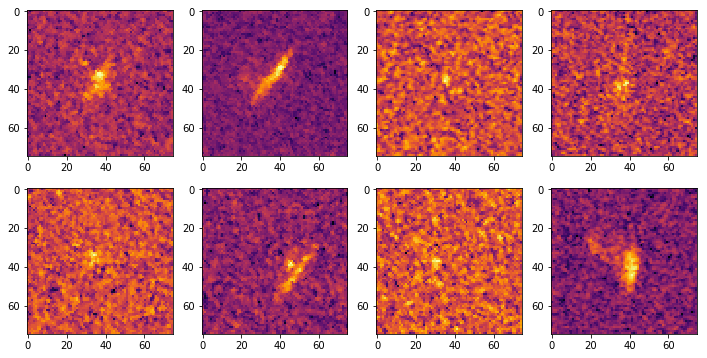

In [14]:
# Plot band_2 - icebergs
figure = plt.figure(1,figsize=(12,6))

for id in range(8):
    axis = figure.add_subplot(2,4,id+1)
    imgarr = np.reshape(np.array(icebergs.iloc[id,1]),(75,75))
    axis.imshow(imgarr,cmap='inferno')
    
plt.show()

<B>Band 2 - Random 8 Ships</B>

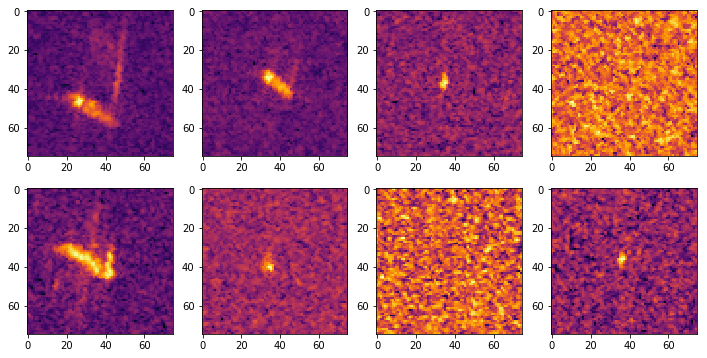

In [15]:
# Plot band_2 - Ships
figure = plt.figure(1,figsize=(12,6))

for id in range(8):
    axis = figure.add_subplot(2,4,id+1)
    imgarr = np.reshape(np.array(ships.iloc[id,1]),(75,75))
    axis.imshow(imgarr,cmap='inferno')
    
plt.show()

### Observations

After reviewing above pictures of Ships and Icebergs, I feel they more like a "blob" type images. There is a bit noise in the background but it is not a "random noise" and there appears to have some spatial correlation. If there are some waves in the background, some type of spatial correlation is expected. Ships seems to have kind of regular structure than icebergs with a bit signficant skewedness.
<BR>
In above pictures set, there are some images that appear more like full noise with less signal of the iceberg/ships shape and it is difficult to identify objects in those using naked eye. Probably using some sort of smoothing or image enhancement techniques to improve contrast between the signal and the background would be helpful here!!

### Applying the Smoothing

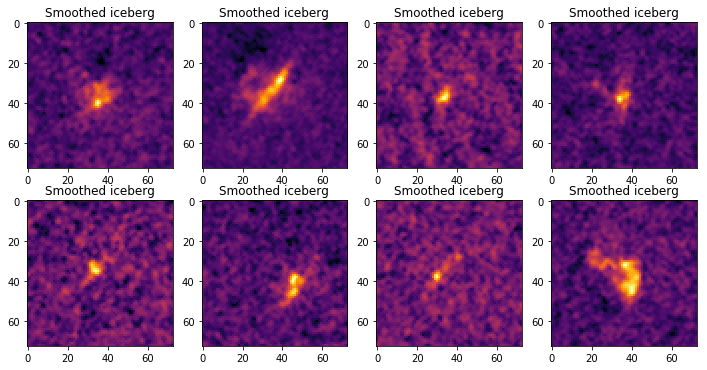

In [13]:
# Plot band_1 icebergs
figure = plt.figure(1,figsize=(12,6))
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])

for id in range(8):
    axis = figure.add_subplot(2,4,id+1)
    imgarr = signal.convolve2d(np.reshape(np.array(icebergs.iloc[id,0]),(75,75)), smooth, mode='valid')
    axis.imshow(imgarr,cmap='inferno')
    axis.set_title('Smoothed iceberg')
    
plt.show()

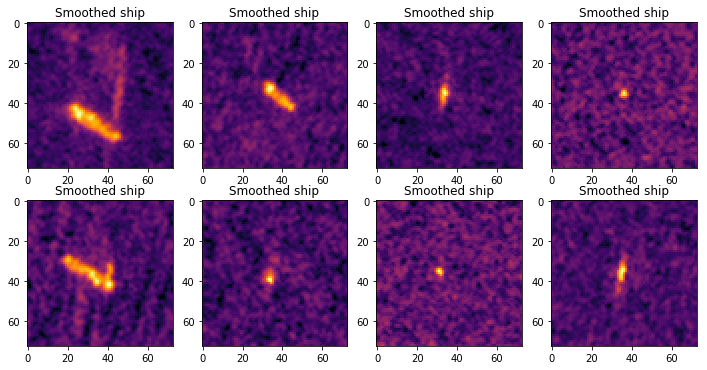

In [14]:
# Plot band_1 ships
figure = plt.figure(1,figsize=(12,6))
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])

for id in range(8):
    axis = figure.add_subplot(2,4,id+1)
    imgarr = signal.convolve2d(np.reshape(np.array(ships.iloc[id,0]),(75,75)), smooth, mode='valid')
    axis.imshow(imgarr,cmap='inferno')
    axis.set_title('Smoothed ship')
    
plt.show()

From the above images, we can see that images got smoothed with little bit blurring effect. But, this helped to improved the constrast between the objects and the corresponding background to locate objects better.

## Convolutional Neural Networks (CNNs / ConvNets)

### Architecture Overview

Convolutional Neural Networks (CNN) appear like other Artificial Neural Networks (ANN) as both are made up of neurons that learn weights and biases during the training. Each neuron receives the input usually in the form of vectors, performs dot operation and sometimes implements non-linearity as a follow up step. This input goes through multiple hidden layers for processing and applying further non-linearity. They still use a loss function like SVM/Softmax on the last fully connected layer(output-layer) to determine the Class probabilities / scores for the input pixel image.<BR>

CovNets are designed specifically to address image classification problems. This assumption allows the CNN feed-forward mechanism most efficient and greatly reduces the no. of parameters in the whole CNN network.<BR>

Regular Neural Nets don’t scale well to process and classify higher resolution images because of large no. of weights generated by fully-connection network.
CovNets take the advantage of the fact that input is an image and adjust the architecture in such a sensible way and layers of CovNet neurons are arranged in 3 dimensions like <b>width, height and depth</b>. Instead of fully-connected layers, the neurons in each layer are only be connected to small section of layer before it. Also, out layer has typically has just of no. of neurons equal to no. of image class categories.<BR>

Below is a simple comparison between 3-layered regular Neural Network on the left and CovNet on the right side. We see that CovNet arranges its neurons in three dimensions (width, height, depth). Each layer in CovNet transforms it’s input 3D volume to an output 3D volume of neuron activations. Input layer (red box) represents an image and this layer has the same dimensions of the image


<table><tr><td width="50%"><img src="images/CNN2.jpeg"  height="75%" width="75%"/></img></td><td><img src="images/CNN3.jpeg"  height="95%" width="95%"/></td></tr></table>

### CovNets - Layers Overview

There are three main layers that make up a CovNet architecture:  <b>Convolutional Layer (CONV), Pooling Layer (POOL), and Fully-Connected Layer (FC)</b>. These 3 layers are stacked to form a complete CovNet architecture. CovNets transform the input image layer by layer from original pixel values to the final class scores as shown in the below example CovNet, a tiny VGG Net, architecture. 

<BR><img src="images/CNN4.jpeg" height="60%" width="60%"/>
<BR>
Each layer in CovNet may or not may not have parameters. For example, CONV/FC layers have parameters while RELU/POOL layers don’t. Similarly, CONV/FC/POOL layers have hyper-parameters while RELU doesn’t have as such.

### Covolutional Layer (CONV)

The Convolutional Layer is the core building block of CovNet as it does perform heavy computational tasks so tuning this later for efficiency can improve the overall performance of CovNet. The layer’s parameters are made up of set of learnable filters (aka kernels) that have small receptive field however they extend through the full depth of input volume. While performing forward pass, each filter is convolved across the width and height of the input volume and then computes the dot product between the filter entries and input to produce the filter activation map.  With the convolution process, CovNet learns the filters that activate when it detects specific feature. Activation maps for all filters along the depth dimension are stacked to form the full output volume of the convolution layer. 

<B>Example 1</B>:<BR><BR>
For example, let’s consider an in input image as volume that has size [32x32x3] ( ex: an RGB of CIFAR-10 image). If we are using filter of size 5x5 applied on the small receptive field of the original image, then each neuron in the convolution layer will have weights to a 5x5x3 region in the input volume for a total of 5*5*3 = 75 weights. We must note that each neuron has a depth of connectivity of 3 which is the depth of input volume. There are multiple neurons (here 5) along the depth and all of them are looking at the same region in the input.<BR>

Each neuron still functions still functions the same calculating the dot product of their weights with the input followed by some non-linearity function.

<table><tr><td width="50%" valigh="center"><img src="images/depthcol.jpg"  height="75%" width="75%"/></td><td><img src="images/neuron_model.jpg"  height="75%" width="75%"/></tr></table><BR>

### Pooling Layer (POOL)

Pooling is one of important CNN concept specifically designed for non-linear down-sampling. There exist multiple non-linear functions to implement pooling and ‘max pooling’ happens to be the most popular choice. It divides the input image into a set of non-overlapping small sections and it outputs the maximum for each such section. The intuition behind this is that exact location of a feature has lesser importance than it’s rough location relative to other features. Pooling helps to reduce the spatial size of its input dimension so as to reduce the number of parameters and amount of computation. This also overcomes the overfitting problem.<BR>

Typically, pooling layers are inserted between successive convolution layers of a CNN architecture.  Most common pooling layers apply filters of size 2x2 with a stride of 2 down-samples at every depth slice in the input by 2 along both width and height. This results in discarding of 75% of the activation but depth dimension remains unchanged. Current trend is to use smaller filter sizes due to aggressive reduction in the size of the representation.<BR>
![Max pooling image](images/Max_pooling.png)

### ReLU Layer 

ReLu stands for ‘Rectified Linear Units’. This layer applies the non-saturating activation function f(x) = max(0, x). Without affecting the receptive fields of CovNets, this layer increases the non-linear properties of the decision function and of overall network.<BR>

We can use other functions also to increase the non-linearity and such examples include  hyperbolic tangent f(x) = tanh(x) and the sigmoid function f(x)_ = 1/ (1+ pow(e,-x)). ReLU is the often the most preferred function because of expedited training speed of the network without incurring much penalty for generalization. 


### Fully-Connected Layer (FC)

 After sequence of convolution and pooling layers, the final Fully-Connected (FC) layer forms a basis for high-level reasoning. In this layer, neurons connect fully to all the activations in the previous layer just like observed in typical regular neural networks. Hence Matrix multiplication with the addition of Bias offset is just enough to compute activations and implement this layer.

### Loss Layer

This final layer determines how training should penalize the deviation between the predicted and true labels. We use different loss functions appropriate for the given task in this layer. Sofmax loss is used for predicting a single class of K mutually exclusive classes. Sigmoid cross-entropy loss is used for predicting K independent class probability values  in [0,1] range.  Similarly, Euclidian loss is used for regressing to real-values labels (-∞, ∞).

## Build CNN Using Keras module

In [51]:
# Let's Import  Keras modules.

from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation, concatenate
from keras.layers import GlobalMaxPooling2D
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input

### Create a CNN Model

In [17]:
# Defining our first CNN model
def CNNModel():
    #Building the model
    model=Sequential()
    
    #Conv Layer 1
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Dropout(0.2))

    #Conv Layer 2
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    #Conv Layer 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    #Conv Layer 4
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    model.add(Flatten())

    #Dense Layers
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #Dense Layer 2
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #Sigmoid Layer
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    ## Defining Adam Optimizer 
    myoptim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    ## Compiling our CNN Model
    model.compile(loss='binary_crossentropy', optimizer=myoptim, metrics=['accuracy'])
    
    ## Printing our model summary
    model.summary()
    
    return model


def proc_callbacks(filepath, patience=2):
    e_stop = EarlyStopping(monitor='val_loss', patience=patience, mode="min", verbose=0)
    mdl_save = ModelCheckpoint(filepath, save_best_only=True, monitor='val_loss', mode='min')
    lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')
    
    return [e_stop, mdl_save, lr_loss]

file_path = '.model_weights.hdf5'
callbacks = proc_callbacks(filepath=file_path, patience=5)

Splitting Training so that we use 75% for training and remaining 25% for validation.

In [18]:
Y_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, Y_train, random_state=1, train_size=0.80)

Training our CNN Model now..

In [52]:
import os
cmodel=CNNModel()
cmodel.fit(X_train_cv, y_train_cv,
          batch_size=24,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)       147584    
__________

## Model Improvements

### Use Feature Scaling

Feature Scaling through Standardization is one of the important "pre-processing" step for many machine learning algorithms. Standardization is performed by re-scaling features such that those new features have the standard normal  distribution properties such that μ=0 and σ=1 where μ is the mean (average) and σ is the standard deviation from the mean; 

Standard scores (also called z scores) of the samples are calculated as follows:
z= x−μ/σ

Standardization of features is not only important when features use different units and different range values, but it is a requirement for many machine learning algorirms like logistical regression, SVM, neural networks etc that use gradient descent as a basis. When certain features are on different scales, then certain feature weights may update faster than other featur weights because feature values play a role in updating the weights.However there are very few algorithms like Decision Treees that they don't get affected by feature scaling.

Feature scaling helps with faster training rates, avoids getting stuck in local optimas.

In [19]:
def generate_scaled_imgs(df):
    imgs = []
    
    for i, row in df.iterrows():
        #make 75x75 image
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)
        
        # Rescale
        a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
        b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
        c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())

        imgs.append(np.dstack((a, b, c)))

    return np.array(imgs)

In [20]:
X_fs_train = generate_scaled_imgs(train)
Y_fs_train = np.array(train['is_iceberg'])

For some input records, incident angle from the satellite is unknown and specified as 'na'. So, we can mark/represent those 'na' values with '0'. This allows us to either include or exclude those 'na' records from our original training set. 

In [21]:
train.inc_angle = train.inc_angle.replace('na',0)
idx_tr = np.where(train.inc_angle>0)

Now, let's try training with records with "known incident angles" like using the above index.

In [22]:
Y_fs_train = Y_fs_train[idx_tr[0]]
X_fs_train = X_fs_train[idx_tr[0],...]

### Image Augmentation for CNN

Deep neural networks require vast amount of training data to achieve relatively good performance. However, images at our disposal may not be that large but we can use image augmentation technique to achieve the better performance on little data sets. Image Augmentation as the name says, creates additional training images from the same source using different image processing techniques like random rotations, flips, shifting images at different angles etc. We can even generate more data from source by contrast streching by enhancing the contrast of source image.

In [23]:
import cv2
np.random.seed(1555)

def generate_Xtra_images(images):
    
    Xtra_images = []
    vert_flip_imgs = []
    horz_flip_imgs = []
      
    for i in range(0,images.shape[0]):
        ax1=images[i,:,:,0]
        ax2=images[i,:,:,1]
        ax3=images[i,:,:,2]
        
        ax1v=cv2.flip(ax1,1)
        ax1h=cv2.flip(ax1,0)
        ax2v=cv2.flip(ax2,1)
        ax2h=cv2.flip(ax2,0)
        ax3v=cv2.flip(ax3,1)
        ax3h=cv2.flip(ax3,0)
        
        vert_flip_imgs.append(np.dstack((ax1v, ax2v, ax3v)))
        horz_flip_imgs.append(np.dstack((ax1h, ax3h, ax3h)))
      
    vert = np.array(vert_flip_imgs)
    horz = np.array(horz_flip_imgs)
       
    Xtra_images = np.concatenate((images,vert,horz))
    
    return Xtra_images

In [24]:
X_fs_tr_more = generate_Xtra_images(X_fs_train)
Y_fs_tr_more = np.concatenate((Y_fs_train,Y_fs_train,Y_fs_train))

### Transfer Learning - VGG16

#### Transfer Learning Basics

Considering a classical supervised learning project of machine learning involving nueral networks, we train our model to perform some classification or regression task on domain A. We provide the model with tons of labled data like images/sounds/data etc as per the task definition. After we train our supervised model A on this dataset, we expect it to perform the task better on unseen data. Similiarly, you may need to build and train Model B on diffrent domain/task by supplying it with appropriate domain data again.<BR>

<img src="images/tln1.png" width="55%" height="55%"/><BR>

We tend to run into issues and training will be unsuccessful if we don't have sufficient label data for the task or domain that we are interested in. Transfer learing helps us solve some issues like inherited bias of training data, generalization failures by models etc by leveraging already existing labled data for some task or domain. We can store this knowledge gained during the training in a Model definition and apply it to solving similar but other tasks or domains.<BR>

<img src="images/tln2.png" width="55%" height="55%"/><BR>

#### VGG16 Architecture

VGG16 is a 16-layer Convolutional Network developed by the Visual Geometry Group (VGG) at Oxford University in the '2014 ILSVRC ImageNet' competition. Their model achieved a 7.5% top 5 error rate on the validation set, which is a result that earned them a second place finish in the competition.

<img src="images/vgg16.png" width="55%" height="55%"/>

We can freeze weights for few starting layers (~10) of VGG16 network as they were trained already on Imagenet data to detect high-level features like curves, edges etc. 

We then fine-tune this VGG16 model by minimizing the cross-entropy loss function using stochastic gradient descent (sgd) algorithm. We are using an initial learning rate of 0.001, which is smaller than the learning rate for training scratch model like 0.01.

In [70]:
Y_train=train['is_iceberg']
test['inc_angle']=pd.to_numeric(test['inc_angle'], errors='coerce')
train['inc_angle']=pd.to_numeric(train['inc_angle'], errors='coerce')#We have only 133 NAs.
train['inc_angle']=train['inc_angle'].fillna(method='pad')
X_angle=train['inc_angle']
X_test_angle=test['inc_angle']

batch_size=64

# Define the image transformations here
imggen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.,
                         height_shift_range = 0.,
                         channel_shift_range=0,
                         zoom_range = 0.2,
                         rotation_range = 10)

# Here is the function that merges our two generators
# We use the exact same generator with the same random seed for both the y and angle arrays
def generate_flow(X1, X2, y):
    imggenX1 = imggen.flow(X1,y,  batch_size=batch_size,seed=55)
    imggenX2 = imggen.flow(X1,X2, batch_size=batch_size,seed=55)
    while True:
            X1i = imggenX1.next()
            X2i = imggenX2.next()
            #Assert arrays are equal - this was for peace of mind, but slows down training
            #np.testing.assert_array_equal(X1i[0],X2i[0])
            yield [X1i[0], X2i[1]], X1i[1]

# Finally create generator
def get_callbacks(filepath, patience=2):
   es = EarlyStopping('val_loss', patience=10, mode="min")
   msave = ModelCheckpoint(filepath, save_best_only=True)
   return [es, msave]

def createVGGModel():
    input_a = Input(shape=[1], name="angle")
    angle_layer = Dense(1, )(input_a)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:], classes=1)
    
    for layer in base_model.layers[:10]:
        layer.trainable = False
    b_out = base_model.get_layer('block5_pool').output
    
    # Addming GlobalMaxPooling layer and Dense, Dropout layers to base layer
    b_out = GlobalMaxPooling2D()(b_out)
    merged_model = concatenate([b_out, angle_layer])
    merged_model  = Dense(512, activation='relu', name='fc2')(merged_model)
    merged_model  = Dropout(0.3)(merged_model)
    merged_model  = Dense(512, activation='relu', name='fc3')(merged_model)
    merged_model  = Dropout(0.3)(merged_model)
    
    predictions = Dense(1, activation='sigmoid')(merged_model)
    vggmodel = Model(inputs=[base_model.input, input_a], outputs=[predictions])
    
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    vggmodel.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return vggmodel

#Using K-fold Cross Validation with Data Augmentation.
def checkCVonVGG(X_train, X_angle, X_test):
    K=3
    folds = list(StratifiedKFold(n_splits=K, shuffle=True, random_state=16).split(X_train, Y_train))
    y_test_pred_log = 0
    y_train_pred_log=0
    y_valid_pred_log = 0.0*Y_train
    
    for j, (train_indx, test_indx) in enumerate(folds):
        print('\nPerforming Cross-validation check on FOLD = ',j)
        X_train_cv = X_train[train_indx]
        Y_train_cv = Y_train[train_indx]
        X_test_cv = X_train[test_indx]
        Y_test_cv = Y_train[test_indx]
        
        #Incident Angle definitions
        X_angle_cv=X_angle[train_indx]
        X_angle_test_cv=X_angle[test_indx]

        #set file path and callbacks
        file_path = "%s_aug_model_weights.hdf5"%j
        callbacks = get_callbacks(filepath=file_path, patience=5)
        extended_imgs = generate_flow(X_train_cv, X_angle_cv, Y_train_cv)
        
        #Now create our extended VGG Model
        vggModel= createVGGModel()
        vggModel.fit_generator(
                extended_imgs,
                steps_per_epoch=24,
                epochs=50,
                shuffle=True,
                verbose=1,
                validation_data=([X_test_cv,X_angle_test_cv], Y_test_cv),
                callbacks=callbacks)

        # Loading the Best Model weights
        vggModel.load_weights(filepath=file_path)
        
        # Get Training Score
        score = vggModel.evaluate([X_train_cv,X_angle_cv], Y_train_cv, verbose=0)
        
        print('Train loss:', score[0])
        print('Train accuracy:', score[1])
        
        # Get Test Score
        score = vggModel.evaluate([X_test_cv,X_angle_test_cv], Y_test_cv, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

        # Get cross validation Score
        pred_valid=vggModel.predict([X_test_cv,X_angle_test_cv])
        y_valid_pred_log[test_indx] = pred_valid.reshape(pred_valid.shape[0])

        # Get Test Scores
        temp_test=vggModel.predict([X_test, X_test_angle])
        y_test_pred_log+=temp_test.reshape(temp_test.shape[0])

        # Get Train Scores
        temp_train=vggModel.predict([X_train, X_angle])
        y_train_pred_log+=temp_train.reshape(temp_train.shape[0])

    y_test_pred_log=y_test_pred_log/K
    y_train_pred_log=y_train_pred_log/K

    print('\n Train Log Loss (Validation) = ',log_loss(Y_train, y_train_pred_log))
    print(' Test Log Loss (Validation) = ',log_loss(Y_train, y_valid_pred_log))
    return y_test_pred_log

#### Perform CrossValidation on Extended VGG16

In [71]:
preditions=checkCVonVGG(X_train, X_angle, X_test)


Performing Cross-validation check on FOLD =  0
Epoch 1/50
24/24 [==============================] - 446s 19s/step - loss: 0.6850 - acc: 0.6637 - val_loss: 0.7519 - val_acc: 0.6523

### Training CNN Model with scaled & augmented data

Let's define our second model to train on augmented data with features scaled

In [75]:
cmodel_2 = CNNModel()
cmodel_2.summary()

batch_size = 32

file_path_2='.mdl2_wts.hdf5'
callbacks_2 = proc_callbacks(filepath=file_path_2, patience=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)       147584    
__________

Now, it is the time to train our second model !!

In [76]:
cmodel_2.fit(X_fs_tr_more, Y_fs_tr_more, batch_size=batch_size, epochs=50, 
          verbose=1, callbacks=callbacks_2, validation_split=0.25)

Train on 3309 samples, validate on 1104 samples
Epoch 1/50
3309/3309 [==============================] - 207s - loss: 0.5902 - acc: 0.6712 - val_loss: 0.5570 - val_acc: 0.7228

## Loading the Best Model - Results

In [77]:
cmodel_2.load_weights(filepath = file_path_2)

score2 = cmodel_2.evaluate(X_fs_train, Y_fs_train, verbose=1)
print('Model 2: Training score:', score2[0])
print('Model 2: Training accuracy:', score2[1])

1471/1471 [==============================] - 25s     

## Generating the submission file - Testing

In [79]:
test.inc_angle = test.inc_angle.replace('na',0)
Xtest = (generate_scaled_imgs(test))
pred_test = cmodel_2.predict(Xtest)

submission = pd.DataFrame({'id': test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('./output/submission.csv', index=False)

         id  is_iceberg
0  5941774d    0.065500
1  4023181e    0.829061
2  b20200e4    0.025101
3  e7f018bb    0.990003
4  4371c8c3    0.924171
5  a8d9b1fd    0.243055
6  29e7727e    0.076737
7  92a51ffb    0.995636
8  c769ac97    0.001672
9  aee0547d    0.003560


### Improvements using Stacking

Stacking is one of the Ensemble learning that improves the machine learning results by combiling several models. This Ensemble approach allows to generate better preditiction peformance when compared to a single model. They are being used by many to win prestigious machine learning competitions like on Netflix, Kaggle, KDD 2009 etc.

Ensemble methods can help to <B>decrease variance</B> (bagging), <b>bias</b> (boosting) or <b>improve predictions</b> (stacking) and can devided into two groups: <BR>

<B>A. Sequential Ensemble Methods: </B>Base learners are created sequentially )Ex: AdaBoost) and made to exploit the dependence between them.  So focus will be on those previously mislabled examples which take higher weight next time.

<B>B. Parallel Ensemble Methods:</B> Base learners are created in parallel (Ex: Random Forest) and made to exploit the independence between them as error can be decreased drastically by averaging.

In homogeneous ensembles, all base learners use a single base learning algorithm making them homogeneous learners.

In heterogeneous ensembles, base learners are of different type and they need to be more accurate and diverse to make the ensemble method to be more accurate.

<B>Bagging:</B><BR>

Bagging is one of the ensemble methods and stands for bootstrap aggregation. In Bagging, multiple estimates are averaged to reduce the variance of an estimate. For example, we can train individual M trees on different subsets of randomly choosen data with replacement.
<img src="images/bagfrm.png">

Bagging uses voting for aggregation of outputs of base learners for classification and averaging for regression.

<B>Boosting:</B><BR>

Boosting is one of the ensemble methods that refers to a family of algorithms that make/convert weak learners to strong learners. The main concept behind boosting is to fit a sequence of weak learners which are usually slighly better than random guessing. Misclassified examples from previous rounds were given more weight in the following rounds.

<B>Stacking:</B><BR>

Stacking is one of the ensemble learning technique that merges various different classification or regression models via a meta-classifier or a meta-regressor. In Stacking, each base models are trained on the complete training set and then the meta-model is trained on the outputs of the base level model as features.

Since base level is made up diversified learning alrgorithms, Stacking ensembles are mostly heterogeneous.









In [89]:
sub_path = "./data/stacking"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "is_iceberg_" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()

,id,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5
0,5941774d,1.943216e-02,0.094676,0.008171,0.010215,0.065500,0.005586
1,4023181e,3.168809e-02,0.952222,0.638348,0.237662,0.829061,0.145927
2,b20200e4,4.000000e-08,0.167771,0.008061,1.000000,0.025101,0.000015
3,e7f018bb,9.925741e-01,0.989356,0.999506,0.999533,0.990003,0.999914
4,4371c8c3,2.215107e-02,0.900321,0.774739,0.994269,0.924171,0.033843


<b>Checking Correlations between submissions</B>

In [90]:
# check correlation
concat_sub.corr()

,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5
is_iceberg_0,1.000000,0.420791,0.809320,0.516280,0.575468,0.890434
is_iceberg_1,0.420791,1.000000,0.489134,0.432111,0.616652,0.493308
is_iceberg_2,0.809320,0.489134,1.000000,0.490128,0.592687,0.789509
is_iceberg_3,0.516280,0.432111,0.490128,1.000000,0.602502,0.548663
is_iceberg_4,0.575468,0.616652,0.592687,0.602502,1.000000,0.648247
is_iceberg_5,0.890434,0.493308,0.789509,0.548663,0.648247,1.000000


In [91]:
# get the data fields ready for stacking
concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:6].max(axis=1)
concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:6].min(axis=1)
concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:6].mean(axis=1)
concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:6].median(axis=1)

### MinMax + BestBase Stacking 

In [92]:
# load the model with best base performance
sub_base = pd.read_csv('./data/stacking/sub_200_ens_densenet.csv')

In [19]:
# set up cutoff threshold for lower and upper bounds
cutoff_lo = 0.8
cutoff_hi = 0.2

In [95]:
concat_sub['is_iceberg_base'] = sub_base['is_iceberg']
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:6] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:6] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_base']))
concat_sub[['id', 'is_iceberg']].to_csv('./output/stack_minmax_bestbase2.csv', 
                                        index=False, float_format='%.6f')

## BenchMarking Evaluation

After end of the completion of the C-CORE Iceberg - CNN Classifer competition on Kaggle, I (Madhan) was able to accomplish my original goal of being in top 50% and <B>achieved 812th Rank out of 3343 and placed among the Top 25% percent<b> among the other competitors.<BR>

<img src="images/madhan_kaggle_result.jpg"  height="45%" width="45%"/><BR>

Kaggle Reference: https://www.kaggle.com/madhan1m


## Final Notes

I believe that I explored and implemented various techniques like data augmentations, features scaling, transfer learning, Ensemble method (Stacking) to improve our CNN model accuracy and loss scores signficantly. However, there is definitely more room for improvement and refinement of methods just like in any data analytics projects.<BR><BR>
I trained these models on my low powered Dell Laptop CPUs which almost took 9-12 hours for each training.I am sure that using cloud-based computing options like AWS resources with high powered machines with strong GPUs like GTX1080s would have expedited the training speed and also I would have options to explore more pre-trained models like InceptionV3, ResNet50, VGG19 etc.<BR><BR>
Fine tuning our CNN model with hyper-paramers tuning like using decaying/dynamic learning-rate would have improved the model accuracy. Also, I feel that having more data to train our model should help improving the generalization power of the model better.

## References

This project has been part of ongoing Kaggle competition and below are the references:
COMPETITION TITLE: Statoil Iceberg Identification Challenge 
COMPETITION SPONSOR: C-CORE and Statoil 
COMPETITION WEBSITE: https://www.kaggle.com/c/statoil-iceberg-classifier-challenge
http://www.cbc.ca/radio/thisisthat/mp-forgets-names-iceberg-150-street-art-trashed-cross-country-skiing-1.3865163/400-ton-iceberg-to-be-sent-on-cross-country-tour-to-celebrate-canada-150-1.3865168 <BR>
http://cs231n.github.io/convolutional-networks/<BR>
https://en.wikipedia.org/wiki/Convolutional_neural_network<BR>
https://flyyufelix.github.io/2016/10/03/fine-tuning-in-keras-part1.html<BR>
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html<BR>
http://sebastianraschka.com/Articles/2014_about_feature_scaling.html<BR>
http://ruder.io/transfer-learning/ <BR>
https://blog.statsbot.co/ensemble-learning-d1dcd548e936<BR>